# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv('train.csv')

In [54]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [55]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [56]:
df_chas_0 = df.loc[(df['chas'] == 0)]
df_chas_1 = df.loc[(df['chas'] == 1)]

#I chose these subsets to because it will be interesting to see how variables fluctuate given proximity to the famous Charles River

# I think that the mean value of the medv values will be higher along the water
#because housing prices tend to go up near water and nice views

df_chas_0['medv'].mean() #22.295
df_chas_1['medv'].mean() #30.175


# I think that the median  value of the tax values will be higher along the river
# because it should mirror the higher median house value proportio
 
df_chas_0['tax'].median() #330
df_chas_1['tax'].median() #307

#Interestingly enough,  I was wrong in this last assumption




307.0

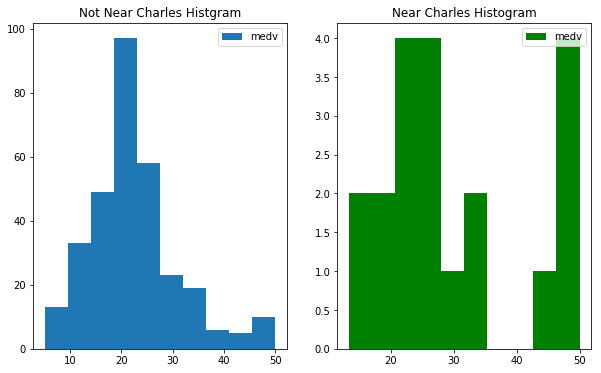

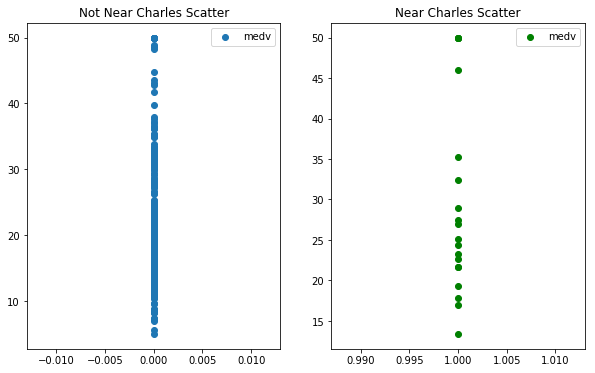

In [74]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_chas_0['medv'], label = 'medv')
ax2.hist(df_chas_1['medv'], label = 'medv', color = 'green')
ax3.scatter(df_chas_0['chas'],df_chas_0['medv'], label = 'medv')
ax4.scatter(df_chas_1['chas'],df_chas_1['medv'], label = 'medv', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Not Near Charles Histgram')
ax2.set_title('Near Charles Histogram')
ax3.set_title('Not Near Charles Scatter')
ax4.set_title('Near Charles Scatter')

plt.show()


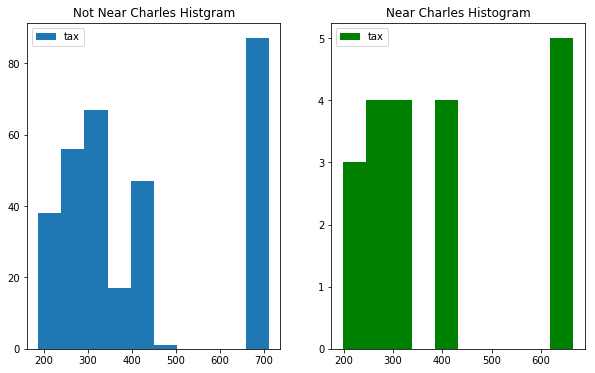

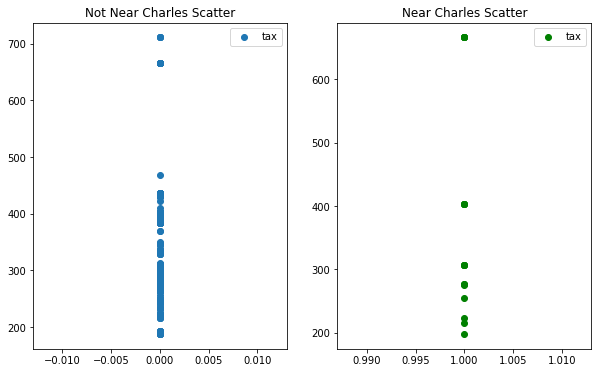

In [77]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_chas_0['tax'], label = 'tax')
ax2.hist(df_chas_1['tax'], label = 'tax', color = 'green')
ax3.scatter(df_chas_0['chas'],df_chas_0['tax'], label = 'tax')
ax4.scatter(df_chas_1['chas'],df_chas_1['tax'], label = 'tax', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Not Near Charles Histgram')
ax2.set_title('Near Charles Histogram')
ax3.set_title('Not Near Charles Scatter')
ax4.set_title('Near Charles Scatter')

plt.show()


In [46]:
df['black'].median()
df_black_under = df.loc[(df['black'] < df['black'].median())]
df_black_over = df.loc[(df['black'] >= df['black'].median())]

#I chose these subsets because lots of studies are done on housing values with respect to racial demographics


# I think that the mean value of the medv values will be higher in the neighborhood under the mean.
# Unfortunately, this guess is based off of institutional racism that causes housing prices to go down
# in higher density black population towns

df_black_under['medv'].mean() #22.493
df_black_over['medv'].mean() #23.042


#I am hoping to disprove the notion that more crime occurs in populations with a higher proportion of African-Americans, at least in Boston

df_black_under['crim'].median() #.879
df_black_over['crim'].median() #.141

# These results confirm that the preconceived notion if false


0.14103

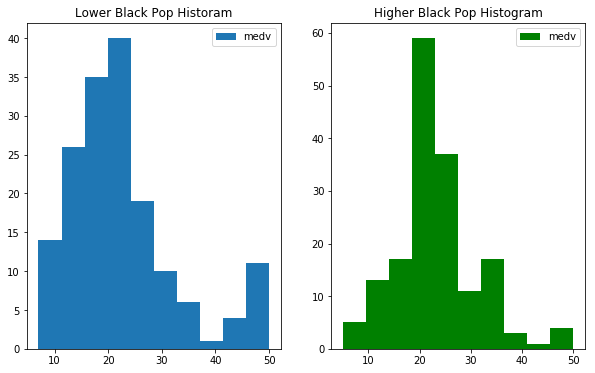

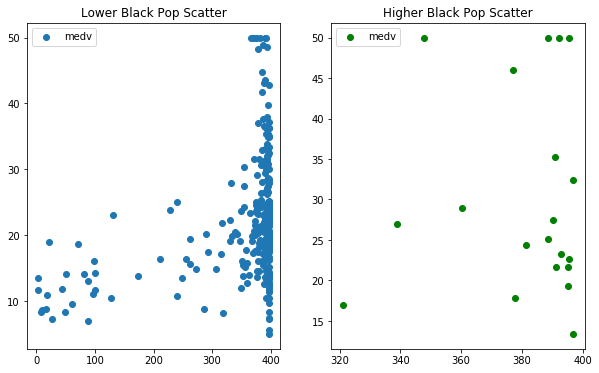

In [84]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_black_under['medv'], label = 'medv')
ax2.hist(df_black_over['medv'], label = 'medv', color = 'green')
ax3.scatter(df_chas_0['black'],df_chas_0['medv'], label = 'medv')
ax4.scatter(df_chas_1['black'],df_chas_1['medv'], label = 'medv', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Lower Black Pop Historam')
ax2.set_title('Higher Black Pop Histogram')
ax3.set_title('Lower Black Pop Scatter')
ax4.set_title('Higher Black Pop Scatter')

plt.show()

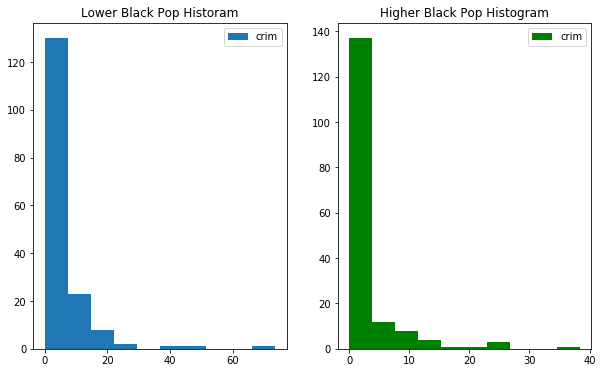

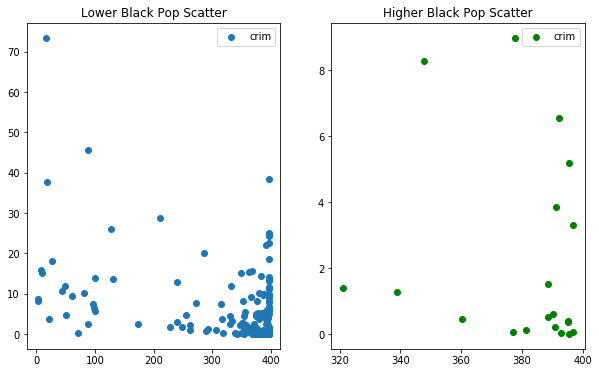

In [85]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_black_under['crim'], label = 'crim')
ax2.hist(df_black_over['crim'], label = 'crim', color = 'green')
ax3.scatter(df_chas_0['black'],df_chas_0['crim'], label = 'crim')
ax4.scatter(df_chas_1['black'],df_chas_1['crim'], label = 'crim', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Lower Black Pop Historam')
ax2.set_title('Higher Black Pop Histogram')
ax3.set_title('Lower Black Pop Scatter')
ax4.set_title('Higher Black Pop Scatter')

plt.show()

In [49]:
df['age'].median()
df_age_under = df.loc[(df['age'] < df['age'].median())]
df_age_over = df.loc[(df['age'] >= df['age'].median())]

#I chose these subsets because historical houses have increased value where I live and I want to see if the same is true in Boston

# I think that the mean value of the medv values will be higher in the older homes
# because the age will add historical value

df_age_under['medv'].mean() #
df_age_over['medv'].mean() #

# I think that the median value of the tax values will be higher in the older homes.
# I am curious because I was wrong with a similar assumption about houses near/far from the Charles
 
df_age_under['tax'].median() #296
df_age_over['tax'].median() #437

437.0

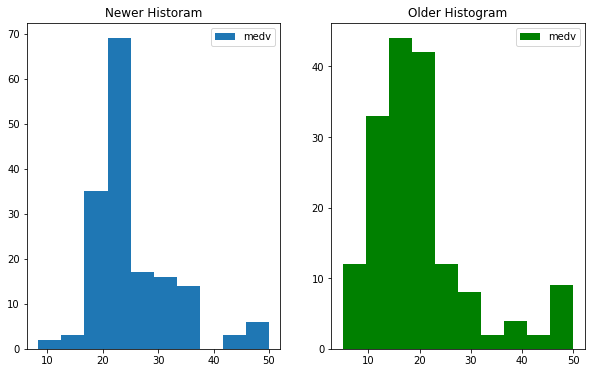

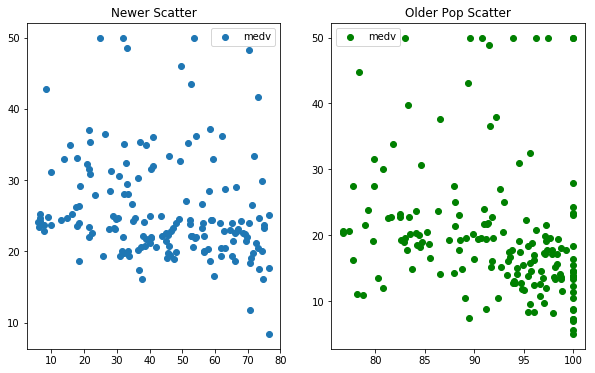

In [88]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_age_under['medv'], label = 'medv')
ax2.hist(df_age_over['medv'], label = 'medv', color = 'green')
ax3.scatter(df_age_under['age'],df_age_under['medv'], label = 'medv')
ax4.scatter(df_age_over['age'],df_age_over['medv'], label = 'medv', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Newer Historam')
ax2.set_title('Older Histogram')
ax3.set_title('Newer Scatter')
ax4.set_title('Older Pop Scatter')

plt.show()

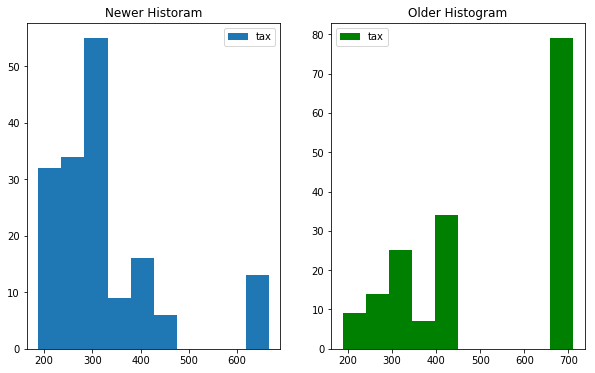

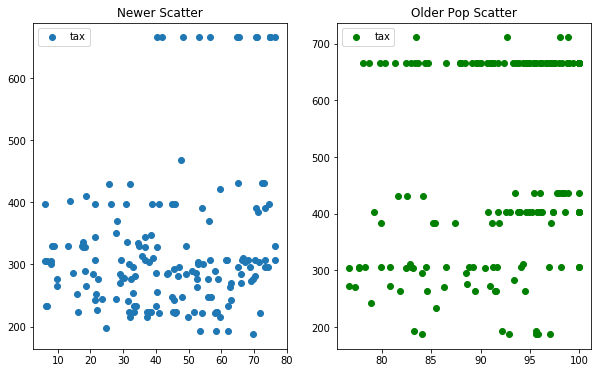

In [90]:
figure1 = plt.figure(figsize = (10,6))
figure2 = plt.figure(figsize = (10,6))

ax1 = figure1.add_subplot(121)
ax2 = figure1.add_subplot(122)
ax3 = figure2.add_subplot(121)
ax4 = figure2.add_subplot(122)
    
ax1.hist(df_age_under['tax'], label = 'tax')
ax2.hist(df_age_over['tax'], label = 'tax', color = 'green')
ax3.scatter(df_age_under['age'],df_age_under['tax'], label = 'tax')
ax4.scatter(df_age_over['age'],df_age_over['tax'], label = 'tax', color = 'green')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('Newer Historam')
ax2.set_title('Older Histogram')
ax3.set_title('Newer Scatter')
ax4.set_title('Older Pop Scatter')

plt.show()

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!